### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

### Loading Dataset

In [2]:
df = pd.read_csv(r"D:\Cognifyz Internship\Dataset.csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.shape

(9551, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Level 2
### Task 1 - Table Booking and Online Delivery
#### Subtasks
    1.Determine the percentage of restaurants that offer table booking and online delivery.
    2.Compare the average ratings of restaurants with table booking and those without.
    3.Analyze the availability of online delivery among restaurants with different price ranges

##### Subtask - 1

In [8]:
total_restaurants = len(df)
total_restaurants

9551

In [9]:
df[df['Has Table booking'] == 'Yes']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9403,6800569,Chaophraya,215,Manchester,"19 Chapel Walks, City Center, Market Street, M...",Market Street,"Market Street, Manchester",-2.243505,53.481740,Thai,...,Pounds(��),Yes,No,No,No,4,4.3,Green,Very Good,422
9415,6801873,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Peter Street, Deansgate, Manchest...","The Midland, Deansgate","The Midland, Deansgate, Manchester",-2.245034,53.477358,"European, Mediterranean, Contemporary",...,Pounds(��),Yes,No,No,No,3,4.2,Green,Very Good,67
9431,18295472,Gymkhana,166,Doha,"Ground Floor, Al Jomrok Boutique Hotel, Souq W...",Souq Waqif,"Souq Waqif, Doha",51.533316,25.289411,Indian,...,Qatari Rial(QR),Yes,No,No,No,4,4.7,Dark Green,Excellent,114
9450,6400621,Nobu - One&Only,189,Cape Town,"One & Only Hotel, Dock Road, V & A Waterfront,...","One and Only Hotel, V & A Waterfront","One and Only Hotel, V & A Waterfront, Cape Town",18.416435,-33.908603,"Japanese, Asian, Seafood, Sushi",...,Rand(R),Yes,No,No,No,4,4.0,Green,Very Good,110


In [10]:
# Number of restaurants that offer table booking
table_booking_count = df[df['Has Table booking'] == 'Yes'].shape[0]
print(f"Number of restaurants that offer table booking: {table_booking_count}")

# Percentage of restaurants that offer table booking
table_booking_percentage = (table_booking_count / total_restaurants) * 100
print(f"Percentage of restaurants that offer table booking (in %): {table_booking_percentage:.2f}")

Number of restaurants that offer table booking: 1158
Percentage of restaurants that offer table booking (in %): 12.12


In [11]:
# Number of restaurants that offer online delivery
online_delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[0]
print(f"Number of restaurants that offer online delivery: {online_delivery_count}")

# Percentage of restaurants that offer online delivery
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100
print(f"Percentage of restaurants that offer online delivery (in %): {online_delivery_percentage:.2f}")

Number of restaurants that offer online delivery: 2451
Percentage of restaurants that offer online delivery (in %): 25.66


##### Subtask - 2

In [12]:
# Average rating for restaurants with table booking
avg_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
print(f"Average rating for restaurants with table booking: {avg_rating_with_table_booking:.2f}")

# Average rating for restaurants without table booking
avg_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating for restaurants without table booking: {avg_rating_without_table_booking:.2f}")


Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


##### Subtask - 3

In [13]:
df1 = df.copy()

In [14]:
df1['Has Online delivery'] = df1['Has Online delivery'].replace({'Yes': 1, 'No': 0})

In [15]:
df1['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

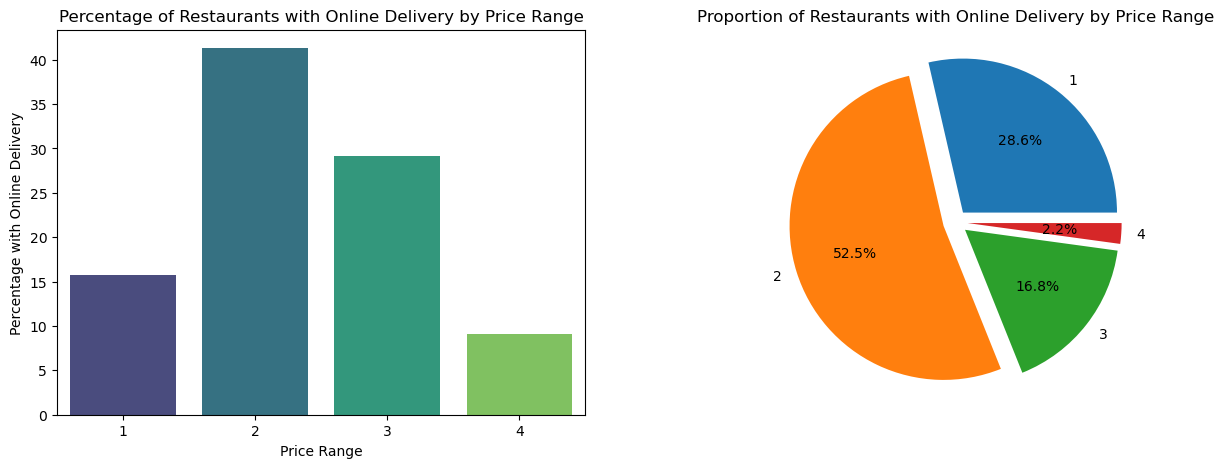

In [16]:
# Group by Price range and calculate online delivery availability
online_delivery = df1.groupby('Price range')['Has Online delivery'].mean() * 100

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x=online_delivery.index, y=online_delivery.values, palette='viridis')
plt.title("Percentage of Restaurants with Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage with Online Delivery")

total_delivery = df1[df1['Has Online delivery'] == 1].groupby('Price range').size()

plt.subplot(1,2,2)
plt.pie(
    total_delivery,
    labels=total_delivery.index,
    autopct='%1.1f%%',
    explode=[0.08] * len(total_delivery)  # Slightly pull out each slice for emphasis
)
plt.title("Proportion of Restaurants with Online Delivery by Price Range")
plt.show()

## Observations
Number of restaurants that offer online delivery is 2451 and which is 25.66 %
Average rating for restaurants with table booking is higher than Average rating for restaurants without table booking
Price range 2 have the highest online delivery of 52.5 %

### Task 2 - Price Range Analysis
#### Subtasks
    1. Determine the most common price range among all the restaurants.
    2. Calculate the average rating for each price range.
    3. Identify the color that represents the highest average rating among different price ranges.

##### Subtask - 1

In [17]:
df['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [18]:
df['Price range'].value_counts().max()

4444

In [19]:
# Get the index corresponding to a specific value
price_range_counts = df['Price range'].value_counts()
index_for_value_1 = price_range_counts[df['Price range'].value_counts()== df['Price range'].value_counts().max()].index
print(index_for_value_1)


Index([1], dtype='int64', name='Price range')


In [20]:
# Determine the most common price range
most_common_price_range = df['Price range'].value_counts().idxmax()
print(f"The most common price range is: {most_common_price_range}")


The most common price range is: 1


##### Subtask - 2

In [21]:
avg_rating_for_each_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print(f"Average rating for each price range:\n{avg_rating_for_each_price_range}")

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


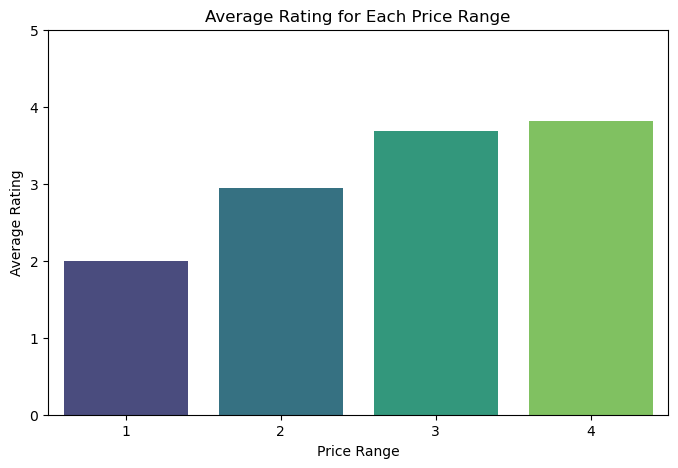

In [22]:
# Plot average rating per price range
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_for_each_price_range.index, y=avg_rating_for_each_price_range.values, palette="viridis")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating for Each Price Range")
plt.ylim(0, 5)  # Ratings are between 0-5
plt.show()

##### Subtask - 3

In [23]:
# Find the price range with the highest average rating
best_price_range = avg_rating_for_each_price_range.idxmax()
best_price_range_rating = avg_rating_for_each_price_range.max()

# Find the corresponding rating color
best_rating_color = df[df["Price range"] == best_price_range]["Rating color"].mode().values[0]

print(f"\n The price range with the highest average rating is: {best_price_range}")
print(f" Highest Average Rating: {best_price_range_rating:.2f}")
print(f" Rating Color for Highest Rated Price Range: {best_rating_color}")


 The price range with the highest average rating is: 4
 Highest Average Rating: 3.82
 Rating Color for Highest Rated Price Range: Yellow


### Observations
Most common price range is 1
Price range 4 has the highest average rating
Rating color for highest rated price range is yellow

### Task 3 - Feature Engineering
#### Subtasks
    1. Extract additional features from the existing columns, such as the length of the restaurant name or address.
    2. Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

##### Subtask - 1

In [24]:
# Add new features
df['Restaurant Name Length']=df['Restaurant Name'].apply(len) 
df['Restaurant Address Length']=df['Address'].apply(len)

In [25]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Restaurant Address Length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


##### Subtask - 2

In [26]:
df["Has Online delivery"].dtype

dtype('O')

In [27]:
df["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [28]:
df['Has Table Booking - Encoded']=df["Has Table booking"].map({'Yes':1,'No':0})
df['Has Online Delivery - Encoded']=df["Has Online delivery"].map({'Yes':1,'No':0})

In [29]:
df['Has Online Delivery - Encoded'].value_counts()

Has Online Delivery - Encoded
0    7100
1    2451
Name: count, dtype: int64

In [30]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Restaurant Address Length,Has Table Booking - Encoded,Has Online Delivery - Encoded
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0
